<a href="https://colab.research.google.com/github/GaneshiUmayangana/Discriptive-Analysis-of-Weather-Condition/blob/main/Data_Analysis_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Observing the Data set


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("weather_classification_data.csv")
data

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [ ]:
data.shape

(13200, 11)

In [ ]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
data.tail()


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


In [ ]:
data.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
data.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

In [ ]:
data.describe(include=['object', 'category'])

,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


In [ ]:
categorical_variables = ['Season','Cloud Cover','Location','Weather Type']
def level_counter (df,vec):
    for var in categorical_variables:
        print(f"Value counts for {var}:")
        print(df[var].value_counts())
        print()

level_counter(data, categorical_variables)


Value counts for Season:
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

Value counts for Cloud Cover:
Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

Value counts for Location:
Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

Value counts for Weather Type:
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64



## Our response variable appears to be precisely balanced at every level, as can be shown.


In [ ]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
numerical_columns =data.select_dtypes(include=['number']).columns

print("Numerical",numerical_columns)
print("Categorical",categorical_columns)

Numerical Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')
Categorical Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')


## Splitting the data set (without encoding )

In [ ]:
Y  = data['Weather Type']
X = data.drop('Weather Type',axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
X_train.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
9645,32.0,64,6.0,86.0,overcast,1007.86,0,Autumn,3.0,coastal
8002,34.0,79,12.0,95.0,overcast,1000.16,2,Spring,3.5,inland
6329,-4.0,83,37.5,72.0,partly cloudy,991.22,3,Winter,1.0,inland
11103,17.0,66,19.5,71.0,overcast,1017.39,0,Spring,4.0,mountain
3600,-3.0,86,3.0,82.0,overcast,996.59,1,Winter,4.0,mountain


In [ ]:
X_train[numerical_columns]

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
9645,32.0,64,6.0,86.0,1007.86,0,3.0
8002,34.0,79,12.0,95.0,1000.16,2,3.5
6329,-4.0,83,37.5,72.0,991.22,3,1.0
11103,17.0,66,19.5,71.0,1017.39,0,4.0
3600,-3.0,86,3.0,82.0,996.59,1,4.0
...,...,...,...,...,...,...,...
11633,3.0,68,2.5,93.0,983.14,1,1.0
1344,24.0,98,11.5,63.0,1017.39,2,1.5
12815,24.0,73,7.5,82.0,1015.08,3,4.0
7293,19.0,33,14.0,18.0,1091.81,6,10.5


In [ ]:
train_set = pd.concat([X_train,Y_train],axis=1)
train_set

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
9645,32.0,64,6.0,86.0,overcast,1007.86,0,Autumn,3.0,coastal,Rainy
8002,34.0,79,12.0,95.0,overcast,1000.16,2,Spring,3.5,inland,Rainy
6329,-4.0,83,37.5,72.0,partly cloudy,991.22,3,Winter,1.0,inland,Snowy
11103,17.0,66,19.5,71.0,overcast,1017.39,0,Spring,4.0,mountain,Rainy
3600,-3.0,86,3.0,82.0,overcast,996.59,1,Winter,4.0,mountain,Snowy
...,...,...,...,...,...,...,...,...,...,...,...
11633,3.0,68,2.5,93.0,overcast,983.14,1,Winter,1.0,inland,Snowy
1344,24.0,98,11.5,63.0,partly cloudy,1017.39,2,Autumn,1.5,inland,Rainy
12815,24.0,73,7.5,82.0,overcast,1015.08,3,Autumn,4.0,inland,Rainy
7293,19.0,33,14.0,18.0,cloudy,1091.81,6,Winter,10.5,mountain,Cloudy


In [ ]:
test_set = pd.concat([X_test,Y_test],axis=1)
test_set

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
11923,13.0,75,9.0,58.0,partly cloudy,1000.52,1,Summer,3.0,inland,Rainy
2331,3.0,73,9.5,59.0,overcast,983.56,0,Winter,2.5,inland,Snowy
217,18.0,74,0.5,39.0,overcast,1007.53,1,Autumn,8.5,mountain,Cloudy
1760,38.0,88,19.5,85.0,partly cloudy,1009.03,0,Spring,4.5,inland,Cloudy
3963,24.0,38,4.5,15.0,partly cloudy,1029.37,9,Spring,7.0,mountain,Sunny
...,...,...,...,...,...,...,...,...,...,...,...
9950,-5.0,97,10.0,78.0,overcast,980.14,1,Winter,1.5,inland,Snowy
4515,24.0,56,8.5,48.0,overcast,1012.30,4,Autumn,7.0,coastal,Cloudy
1996,12.0,89,6.5,86.0,overcast,992.27,2,Summer,1.5,coastal,Rainy
1457,28.0,62,6.5,69.0,overcast,994.82,1,Winter,3.0,mountain,Rainy


# Encoding the categorical variables

In [ ]:
data_encoded = data.copy()

In [ ]:
data_encoded

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['Weather Type'])
data_encoded['Weather Type'] = le.transform(data_encoded['Weather Type'])

In [ ]:
for i, class_ in enumerate(le.classes_):
    print(f'{class_} is encoded as {i}')

inverse_transformed = list(le.inverse_transform([0, 1, 2, 3]))
print("Inverse Transformed:", inverse_transformed)

Cloudy is encoded as 0
Rainy is encoded as 1
Snowy is encoded as 2
Sunny is encoded as 3
Inverse Transformed: ['Cloudy', 'Rainy', 'Snowy', 'Sunny']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
columns_to_encode = ['Season', 'Cloud Cover', 'Location']

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data_encoded [columns_to_encode])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(columns_to_encode))
data_encoded = data_encoded.drop(columns=columns_to_encode).join(one_hot_df)


In [ ]:
data_encoded.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)', 'Weather Type',
       'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Cloud Cover_clear', 'Cloud Cover_cloudy', 'Cloud Cover_overcast',
       'Cloud Cover_partly cloudy', 'Location_coastal', 'Location_inland',
       'Location_mountain'],
      dtype='object')

In [ ]:
data_encoded

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Location_coastal,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,39.0,96,8.5,71.0,1011.43,7,10.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,30.0,64,7.0,16.0,1018.72,5,5.5,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,38.0,83,1.5,82.0,1026.25,7,1.0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,27.0,74,17.0,66.0,990.67,1,2.5,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13196,-1.0,76,3.5,23.0,1067.23,1,6.0,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
13197,30.0,77,5.5,28.0,1012.69,3,9.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
13198,3.0,76,10.0,94.0,984.27,0,2.0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Splitting the data set (with encoding )

In [ ]:
Ye  = data_encoded['Weather Type']
Xe = data_encoded.drop('Weather Type',axis=1)

In [ ]:
Xe_train, Xe_test, Ye_train, Ye_test = train_test_split(Xe, Ye, test_size=0.2, random_state=10)

In [ ]:
train_set_e = pd.concat([Xe_train,Ye_train],axis=1)
train_set_e

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Location_coastal,Location_inland,Location_mountain,Weather Type
9645,32.0,64,6.0,86.0,1007.86,0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
8002,34.0,79,12.0,95.0,1000.16,2,3.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
6329,-4.0,83,37.5,72.0,991.22,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2
11103,17.0,66,19.5,71.0,1017.39,0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3600,-3.0,86,3.0,82.0,996.59,1,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11633,3.0,68,2.5,93.0,983.14,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2
1344,24.0,98,11.5,63.0,1017.39,2,1.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
12815,24.0,73,7.5,82.0,1015.08,3,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
7293,19.0,33,14.0,18.0,1091.81,6,10.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [ ]:
train_set_e.dtypes

Temperature                  float64
Humidity                       int64
Wind Speed                   float64
Precipitation (%)            float64
Atmospheric Pressure         float64
UV Index                       int64
Visibility (km)              float64
Season_Autumn                float64
Season_Spring                float64
Season_Summer                float64
Season_Winter                float64
Cloud Cover_clear            float64
Cloud Cover_cloudy           float64
Cloud Cover_overcast         float64
Cloud Cover_partly cloudy    float64
Location_coastal             float64
Location_inland              float64
Location_mountain            float64
Weather Type                   int32
dtype: object

In [ ]:
test_set_e = pd.concat([Xe_test,Ye_test],axis=1)
test_set_e

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Location_coastal,Location_inland,Location_mountain,Weather Type
11923,13.0,75,9.0,58.0,1000.52,1,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2331,3.0,73,9.5,59.0,983.56,0,2.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2
217,18.0,74,0.5,39.0,1007.53,1,8.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1760,38.0,88,19.5,85.0,1009.03,0,4.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
3963,24.0,38,4.5,15.0,1029.37,9,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,-5.0,97,10.0,78.0,980.14,1,1.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2
4515,24.0,56,8.5,48.0,1012.30,4,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1996,12.0,89,6.5,86.0,992.27,2,1.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1457,28.0,62,6.5,69.0,994.82,1,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1


## Outlier detection using DBSCAN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

ss = StandardScaler().fit_transform(Xe_train.values)
db = DBSCAN(eps=3.0, min_samples=10).fit(ss)
labels = db.labels_

label_counts = pd.Series(labels).value_counts()

In [ ]:
num_outliers = label_counts.get(-1, 0)  # Get count of -1 labels, default to 0 if not found
total_points = len(labels)

percentage_outliers = (num_outliers / total_points) * 100

print(f"Total points: {total_points}")
print(f"Number of outliers: {num_outliers}")
print(f"Percentage of outliers: {percentage_outliers:.2f}%")

Total points: 10560
Number of outliers: 679
Percentage of outliers: 6.43%


### Isolate Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# Initialize the Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model
iso_forest.fit(Xe_train)

# Predict outliers (1 for inliers, -1 for outliers)
y_pred = iso_forest.predict(Xe_train)

# Calculate the percentage of outliers
outlier_percentage = (y_pred == -1).sum() / len(y_pred) * 100
print(f'Percentage of outliers: {outlier_percentage:.2f}%')

Percentage of outliers: 10.00%


## Since the outlier percentage is only 6.43%, it is decided not to eliminate the outliers.

# EDA


## 1) Distribution of the variables

### i) Numerical Variables

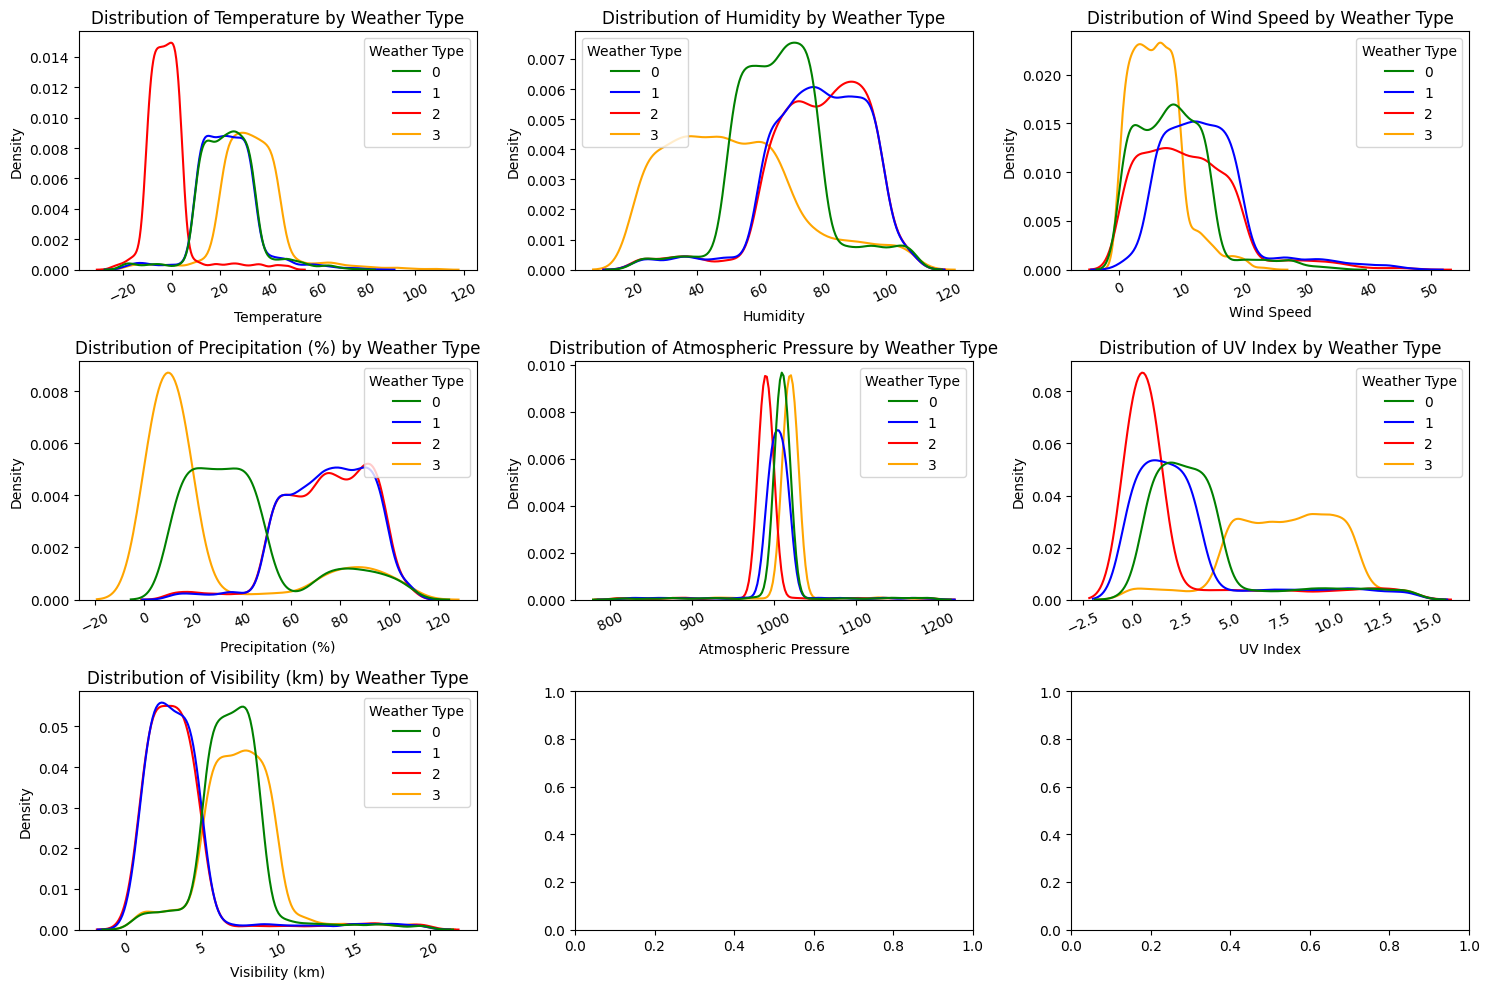

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
ax = ax.flatten()

# Custom color palette
palette = {0: 'green', 1: 'blue', 2: 'red', 3: 'orange'}

for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=Xe_train, x=col, hue=Ye_train, palette=palette, ax=ax[i])
    ax[i].set_title(f"Distribution of {col} by {'Weather Type'}")
    ax[i].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()

### ii) Categorical Variables

##### ChiSquare test for before encoded variables

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
# Function to perform Chi-Square test and return results as a DataFrame
def chi_square_test(df, target_variable, encoded_columns):
    results = []
    for column in encoded_columns:
        contingency_table = pd.crosstab(df[target_variable], df[column])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        result = "Dependent" if p < 0.05 else "Independent"
        results.append([column, chi2, p, result])

    results_df = pd.DataFrame(results, columns=['Column', 'Chi2', 'p-value', 'Dependency'])
    return results_df

# Perform Chi-Square test with 'Weather Type' variable
results_df = chi_square_test(train_set, 'Weather Type', columns_to_encode)

# Print the results as a table
print(results_df)

        Column         Chi2        p-value Dependency
0       Season  3752.252702   0.000000e+00  Dependent
1  Cloud Cover  7565.921121   0.000000e+00  Dependent
2     Location   997.574228  2.992614e-212  Dependent


## 2) Correlation Analysis

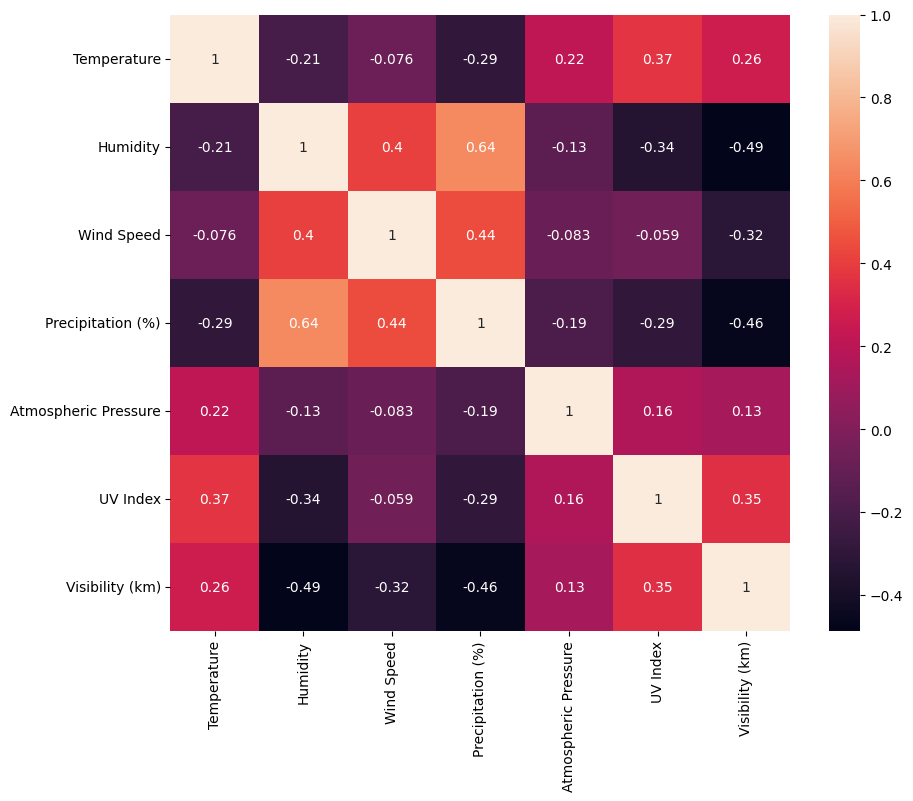

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train_set_e[numerical_columns].corr(),annot=True)
plt.show()

## 3) Seasonal Trends

## 4) Location-Based Analysis

### 5) Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt

#### Numerical Variables

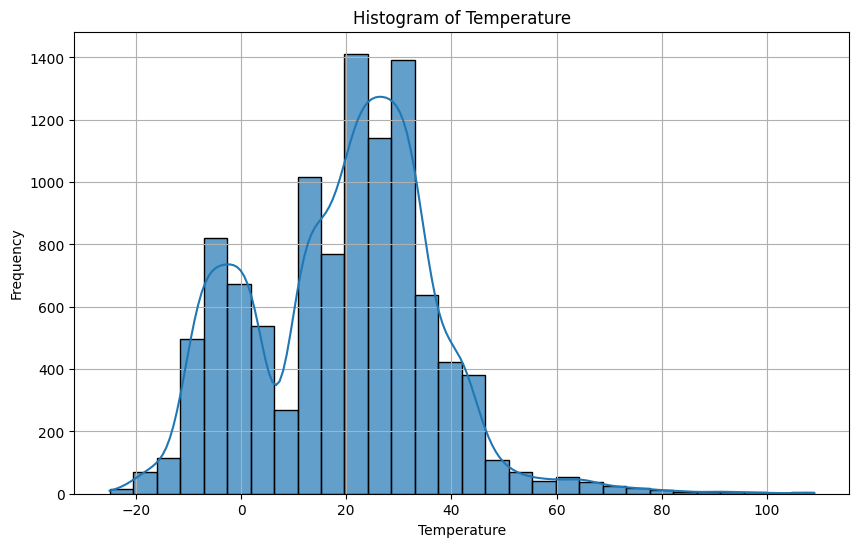

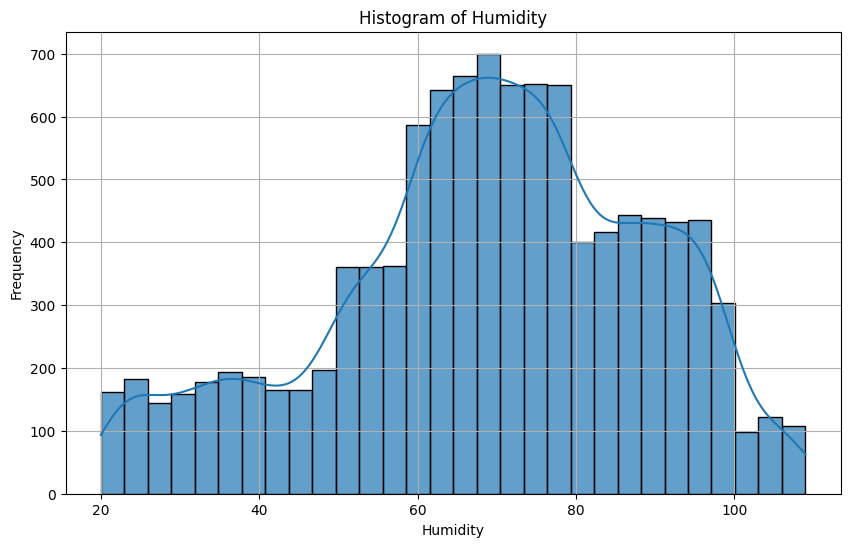

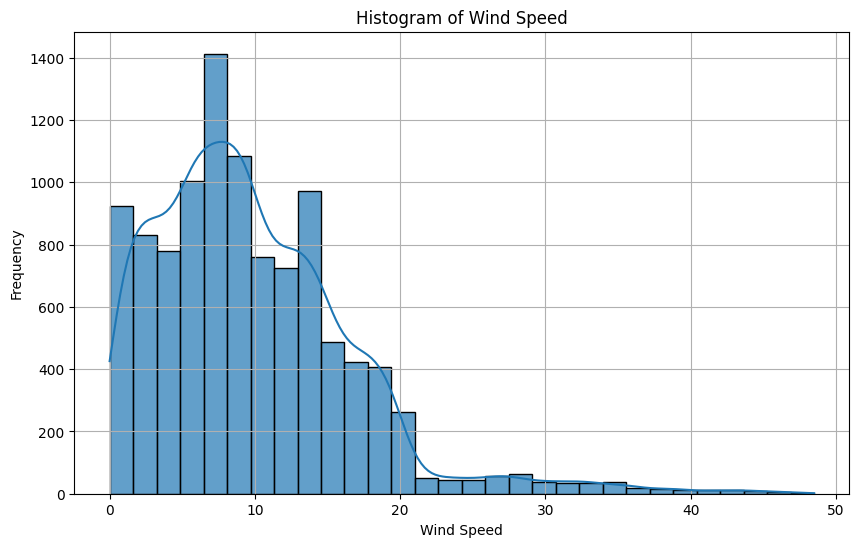

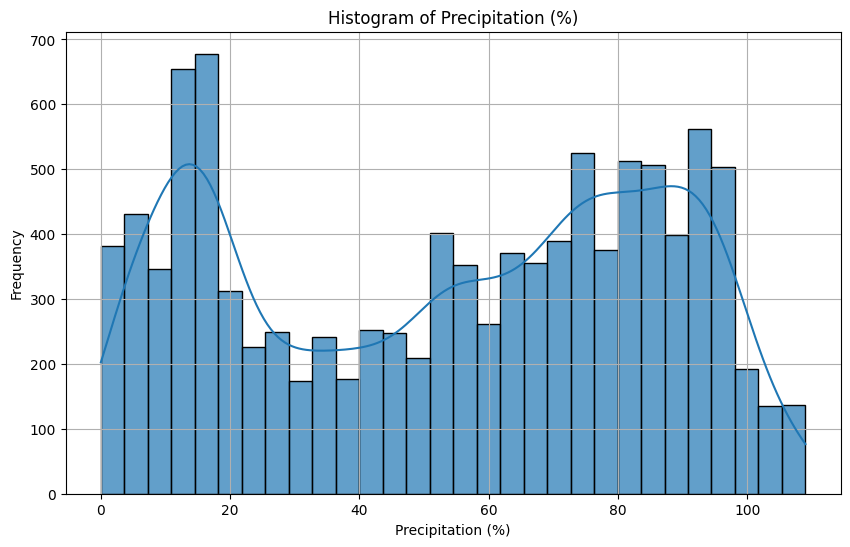

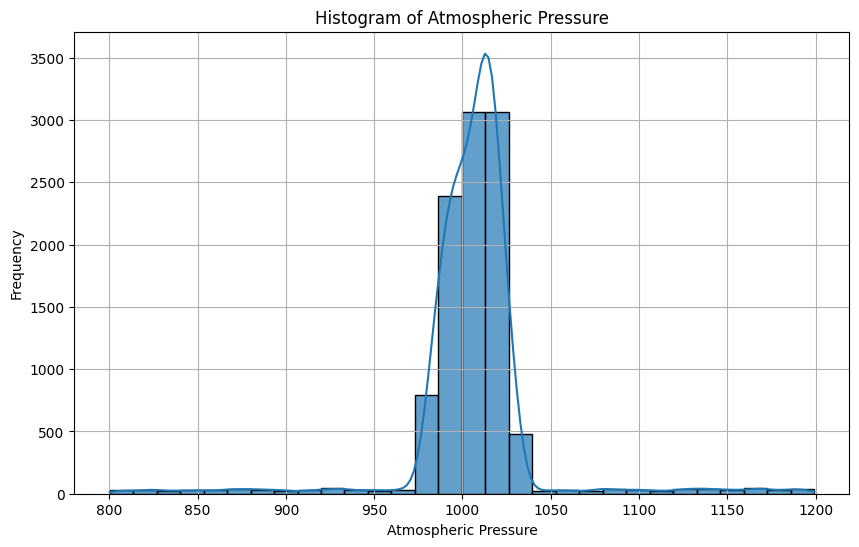

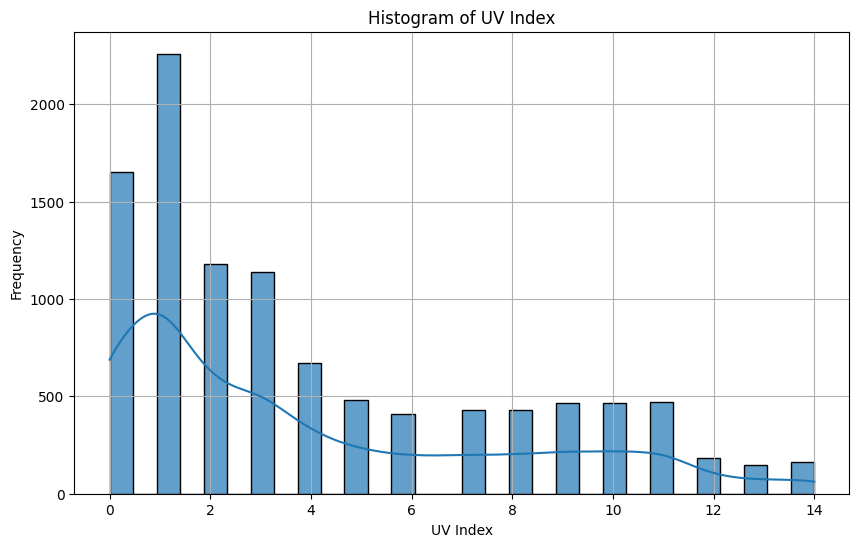

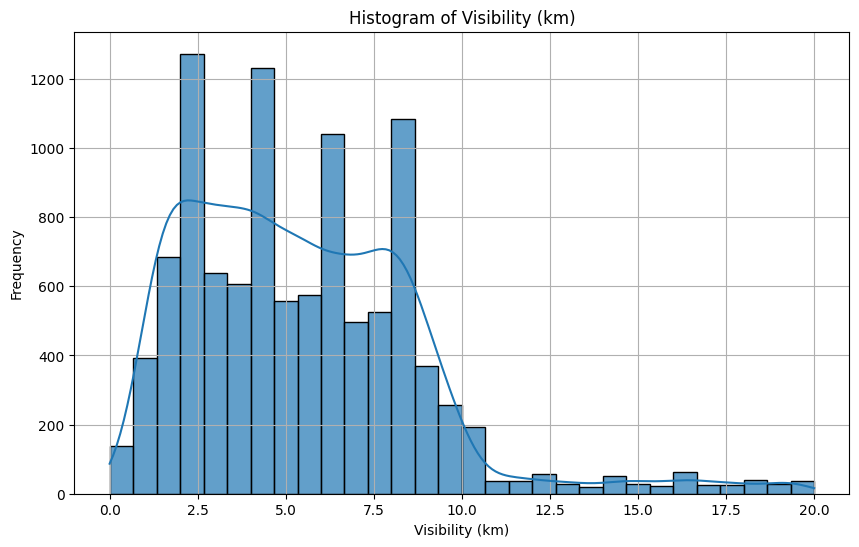

In [ ]:

# Plot histograms for all variables
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(Xe_train[column].dropna(), bins=30, kde=True, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

#### categorical variables

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\1043269199.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


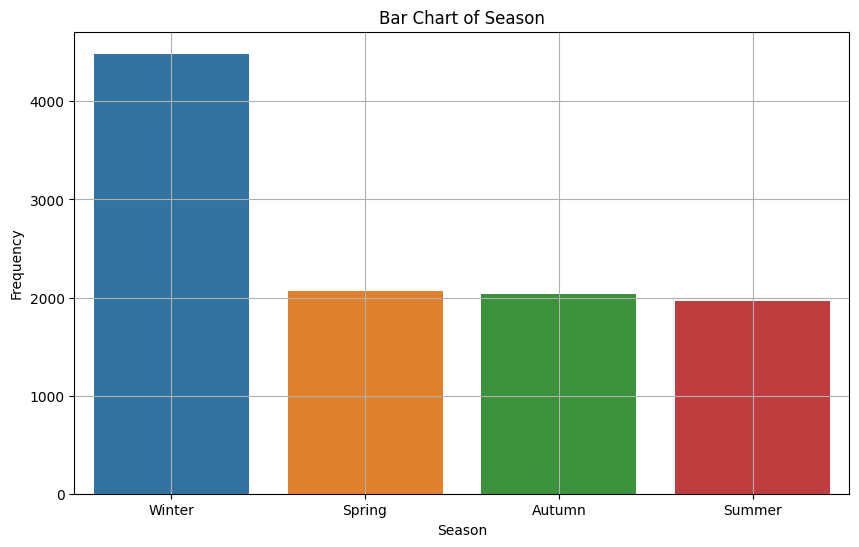

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\1043269199.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


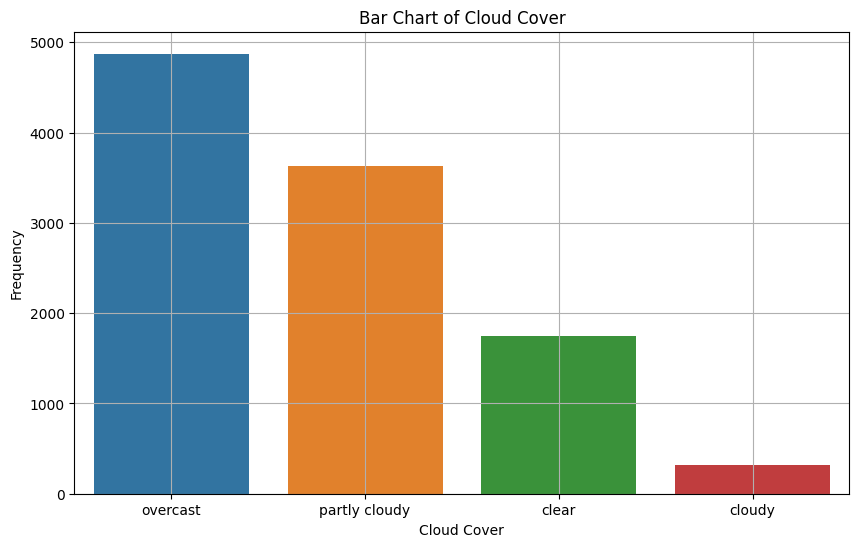

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\1043269199.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)
C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\1043269199.py:8: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)


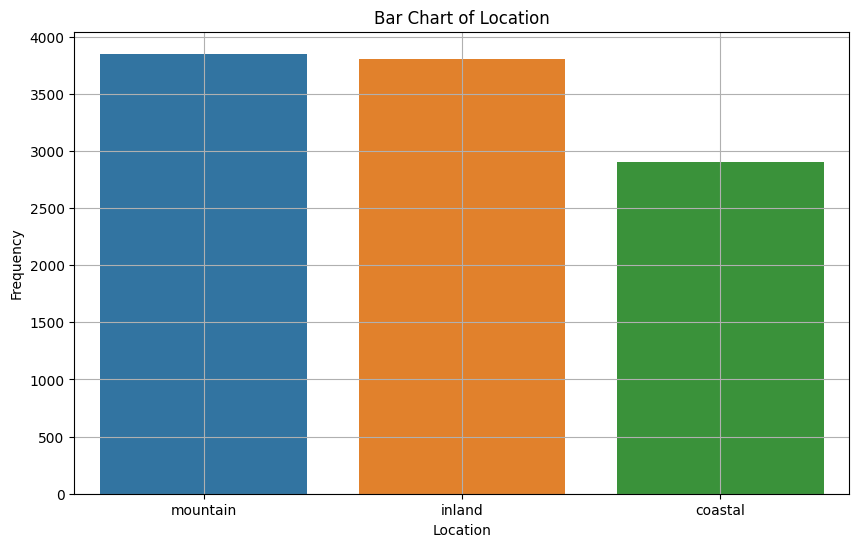

In [ ]:
# Custom color palette with four different colors
custom_palette = sns.color_palette(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"])

# Plot bar charts for categorical variables with four different colors
for column in columns_to_encode:
    plt.figure(figsize=(10, 6))
    value_counts = train_set[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette)
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

#### Numerical Predictors with response# Plot box plots for numerical predictors against the categorical response

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\1013104524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')


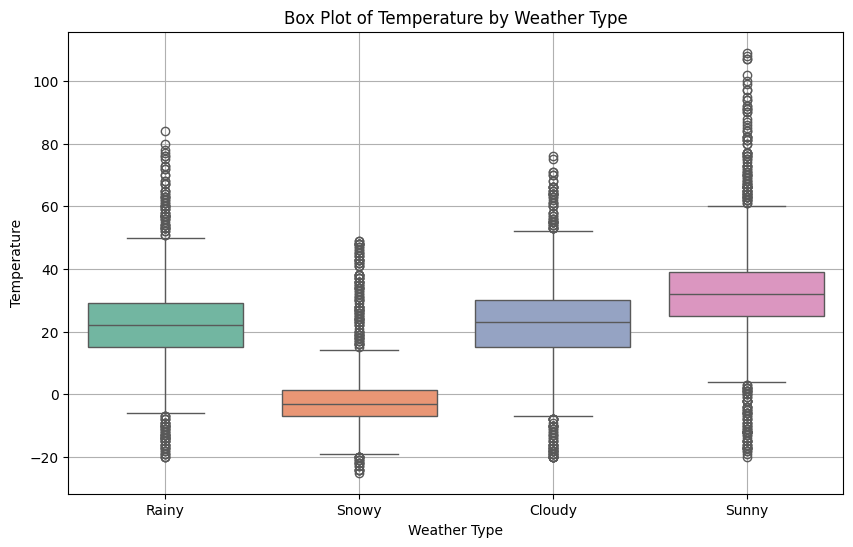

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\1013104524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')


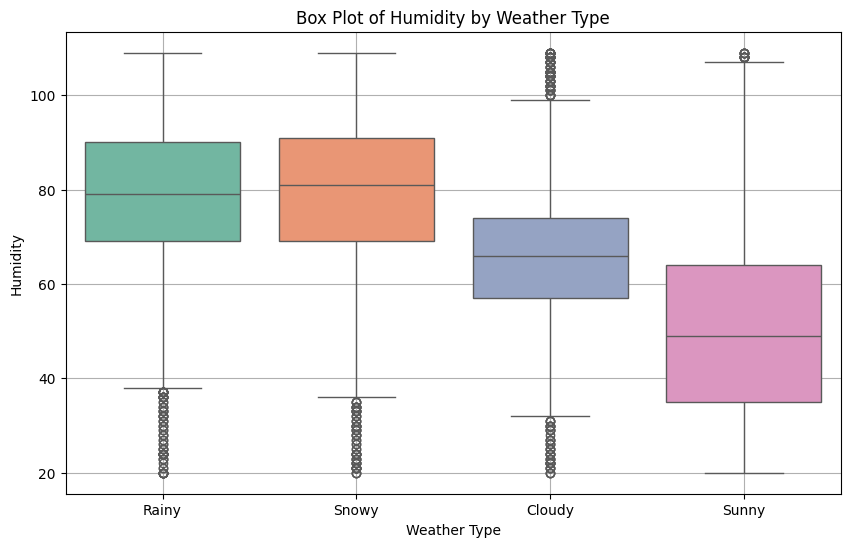

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\1013104524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')


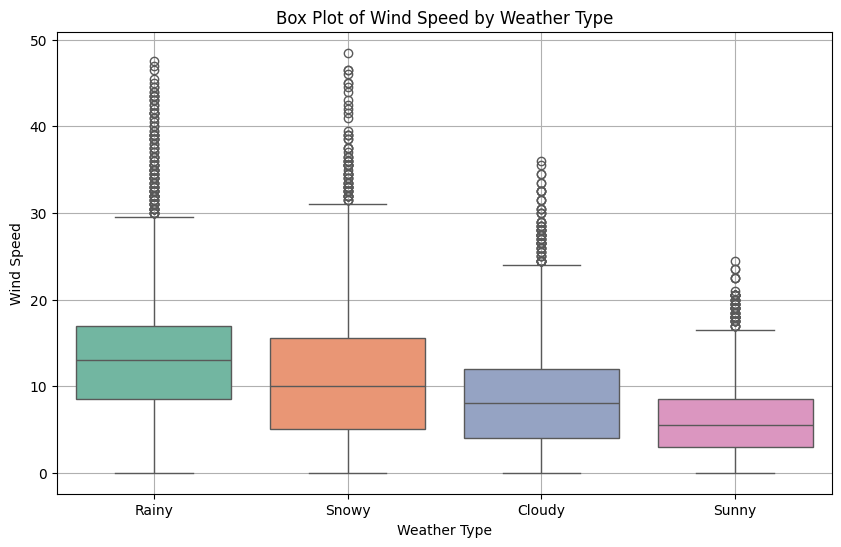

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\1013104524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')


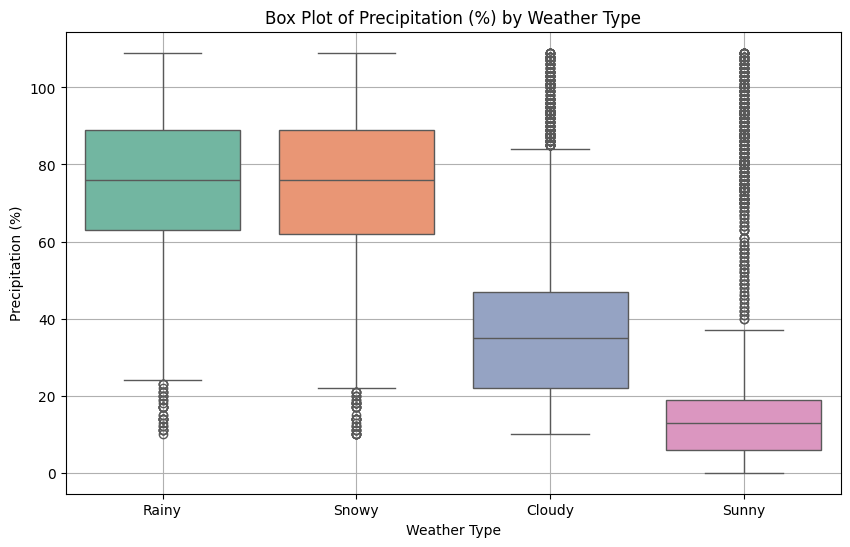

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\1013104524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')


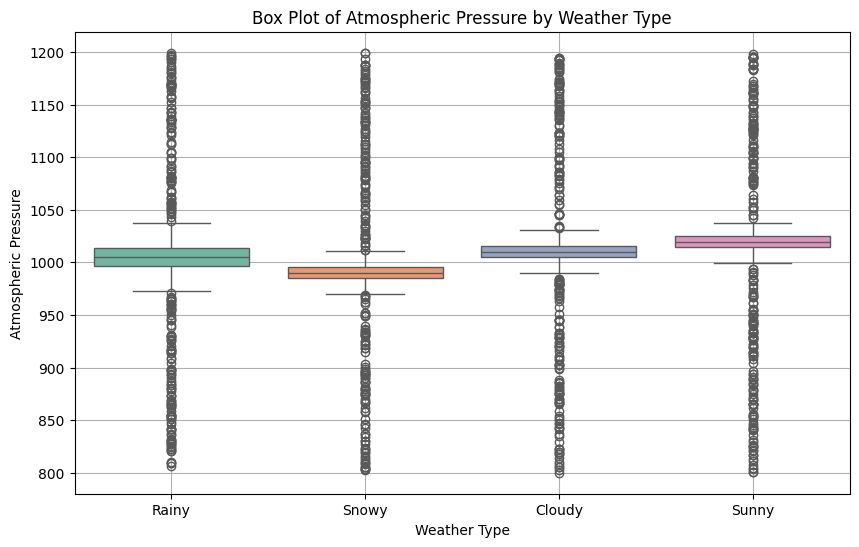

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\1013104524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')


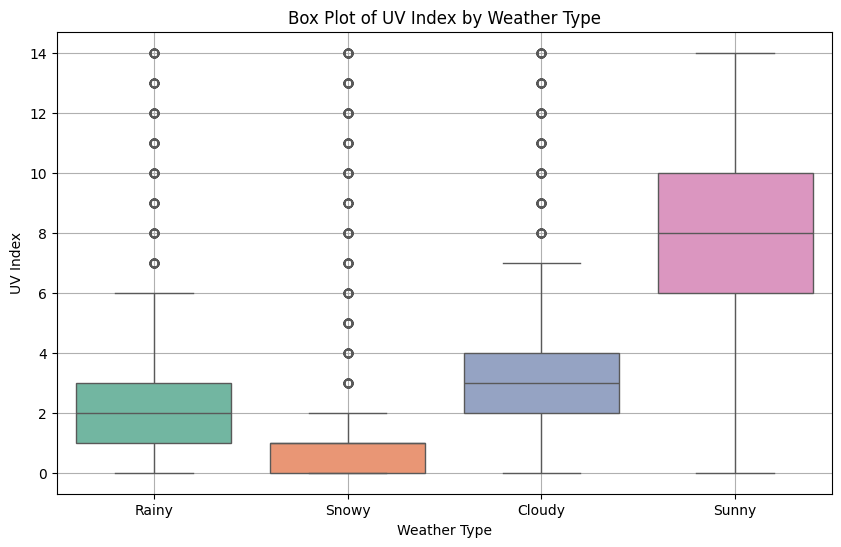

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\1013104524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')


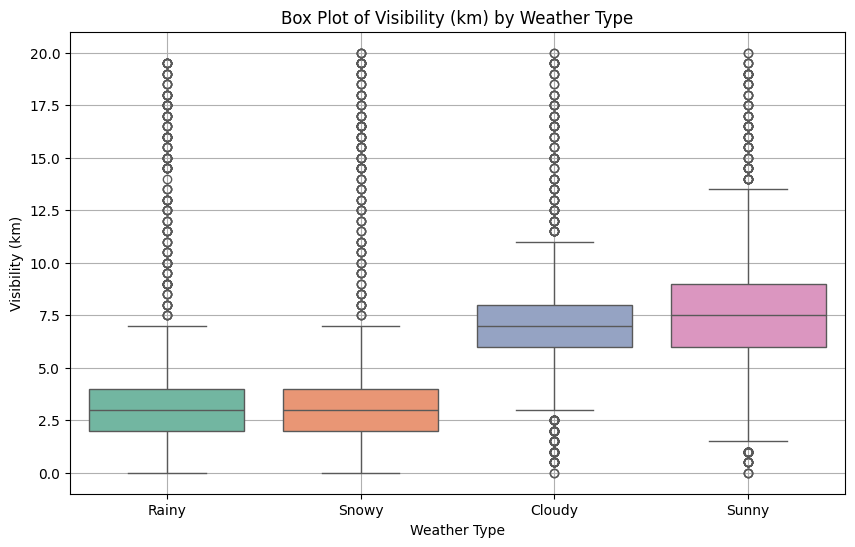

In [ ]:
# Plot box plots for numerical predictors against the categorical response
categorical_response = 'Weather Type'

for predictor in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')
    plt.title(f'Box Plot of {predictor} by {categorical_response}')
    plt.xlabel(categorical_response)
    plt.ylabel(predictor)
    plt.grid(True)
    plt.show()

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\3404664024.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')


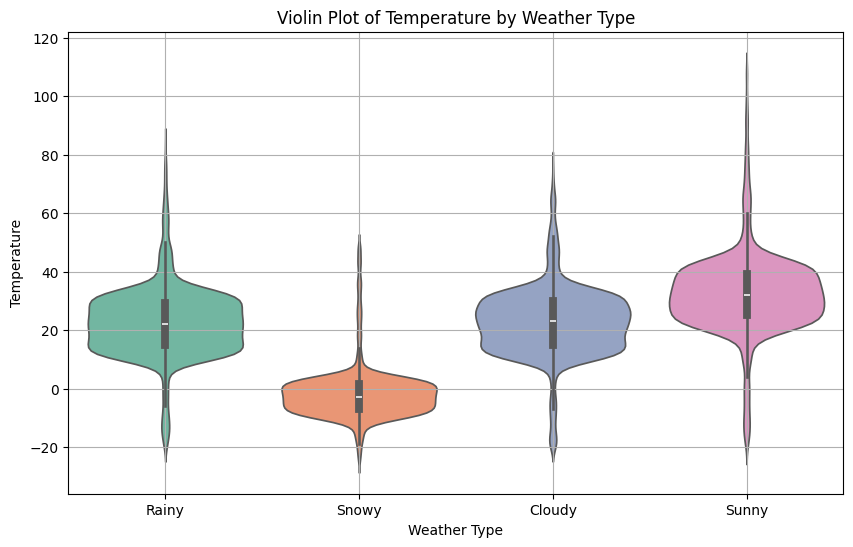

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\3404664024.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')


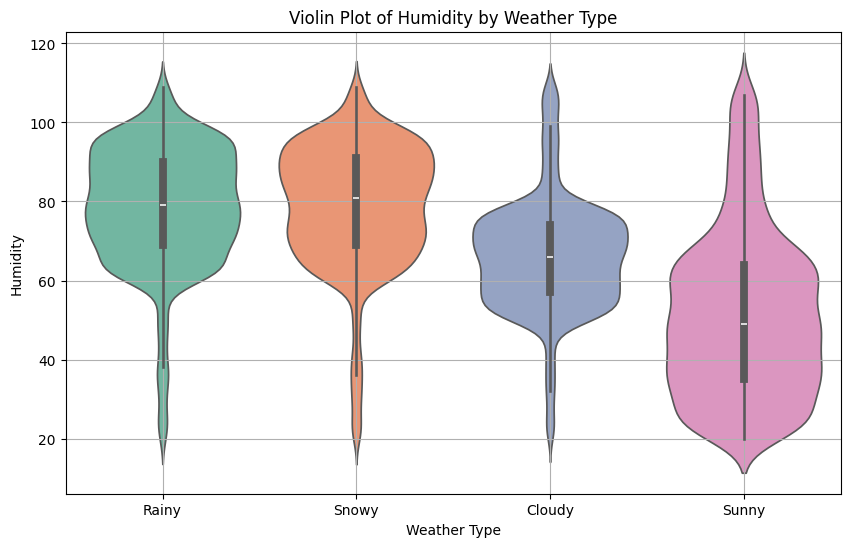

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\3404664024.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')


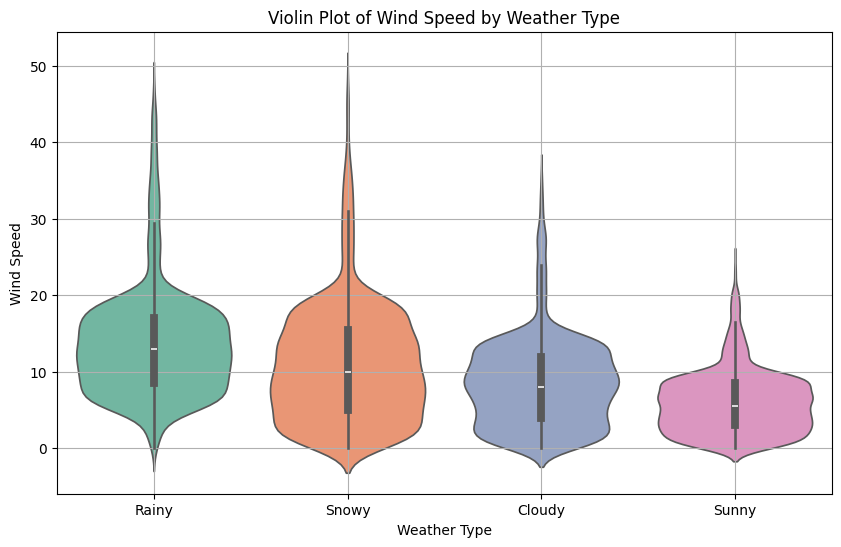

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\3404664024.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')


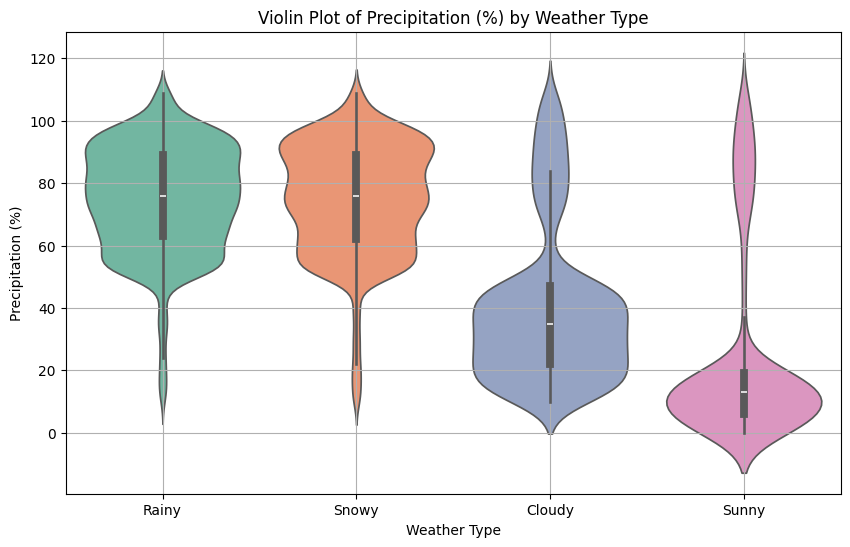

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\3404664024.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')


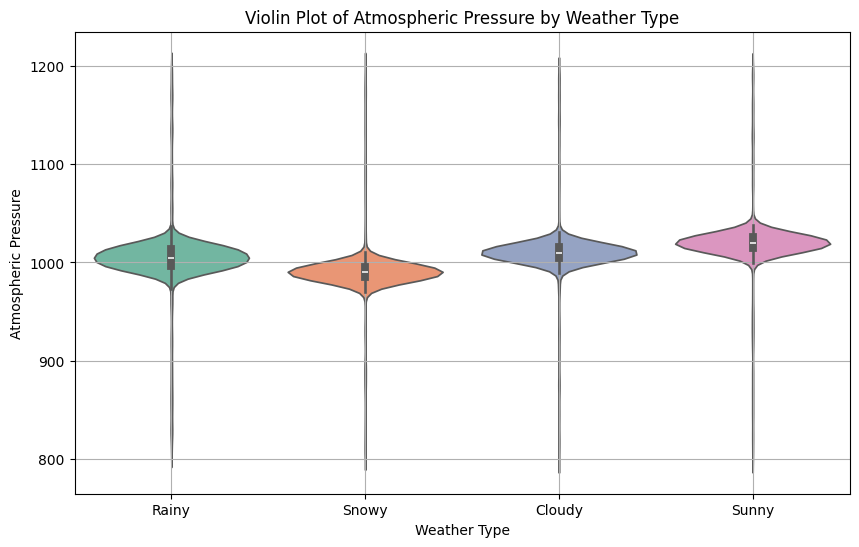

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\3404664024.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')


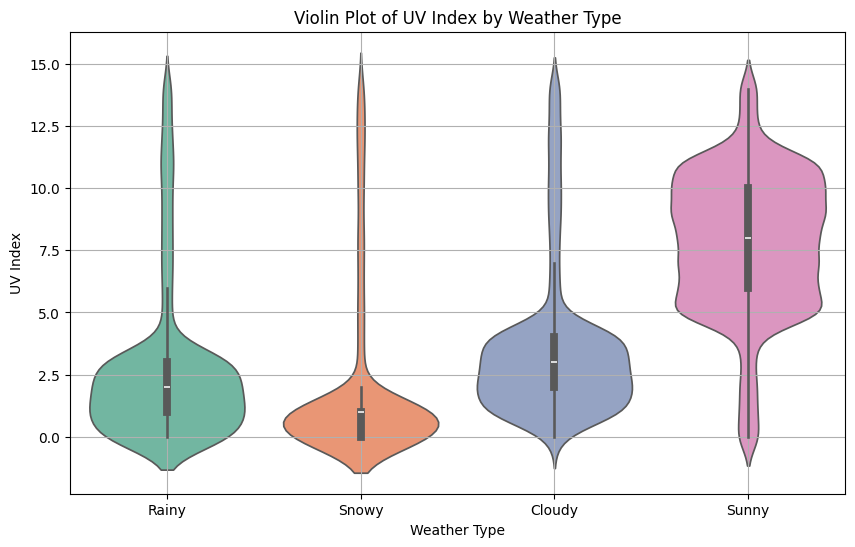

C:\Users\Ganeshi\AppData\Local\Temp\ipykernel_2412\3404664024.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')


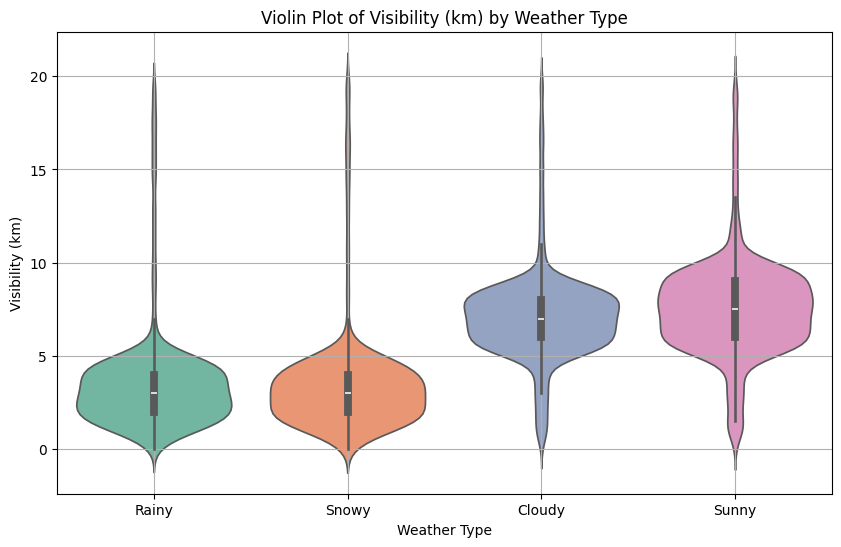

In [ ]:
# Plot violin plots for numerical predictors against the categorical response
for predictor in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=categorical_response, y=predictor, data=train_set, palette='Set2')
    plt.title(f'Violin Plot of {predictor} by {categorical_response}')
    plt.xlabel(categorical_response)
    plt.ylabel(predictor)
    plt.grid(True)
    plt.show()

### Humidity and Wind Speed

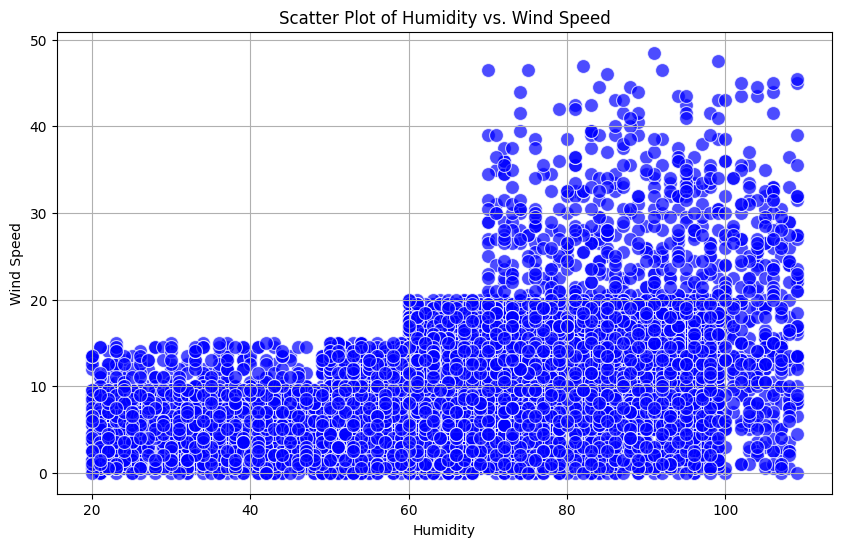

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_set_e, x='Humidity', y='Wind Speed', s=100, color='blue', alpha=0.7)
plt.title('Scatter Plot of Humidity vs. Wind Speed')
plt.xlabel('Humidity')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()

### Temperature and Wind Speed

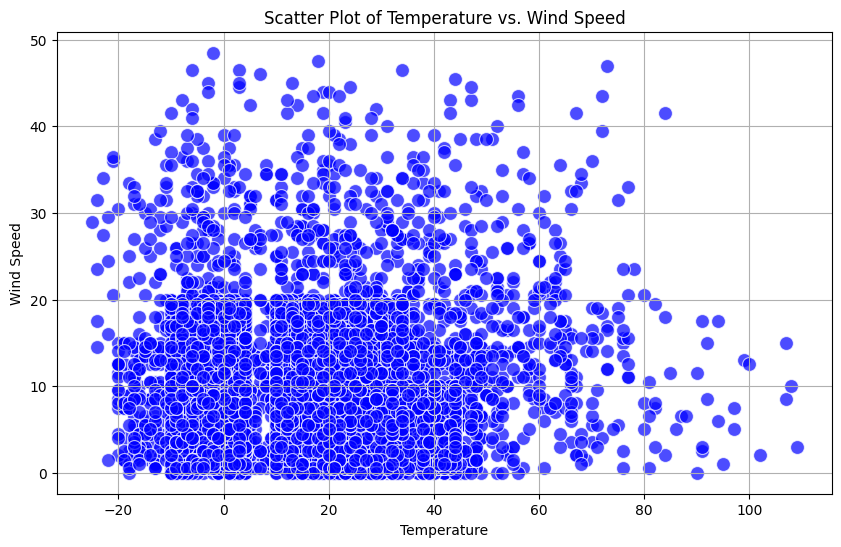

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_set_e, x='Temperature', y='Wind Speed', s=100, color='blue', alpha=0.7)
plt.title('Scatter Plot of Temperature vs. Wind Speed')
plt.xlabel('Temperature')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()

### Humidity Temperature

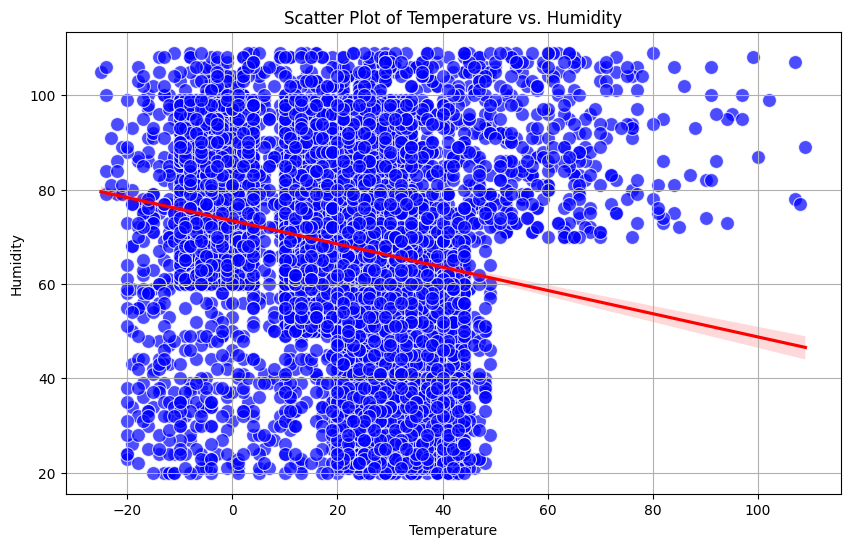

In [ ]:
# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_set_e, x='Temperature', y='Humidity', s=100, color='blue', alpha=0.7)
sns.regplot(data=train_set_e, x='Temperature', y='Humidity', scatter=False, color='red')
plt.title('Scatter Plot of Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

### Humidity Vs Precipitation (%)

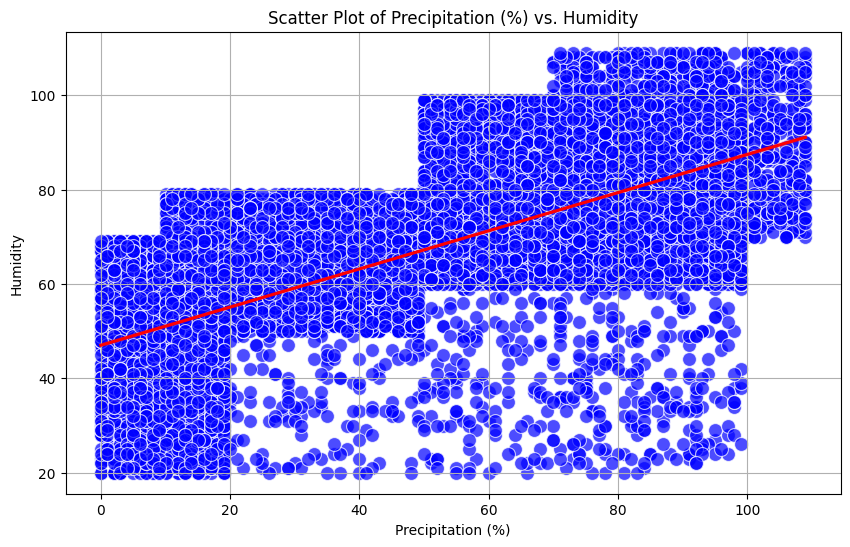

In [ ]:
# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_set_e, x='Precipitation (%)', y='Humidity', s=100, color='blue', alpha=0.7)
sns.regplot(data=train_set_e, x='Precipitation (%)', y='Humidity', scatter=False, color='red')
plt.title('Scatter Plot of Precipitation (%) vs. Humidity')
plt.xlabel('Precipitation (%)')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

### Average wind speed with lcation

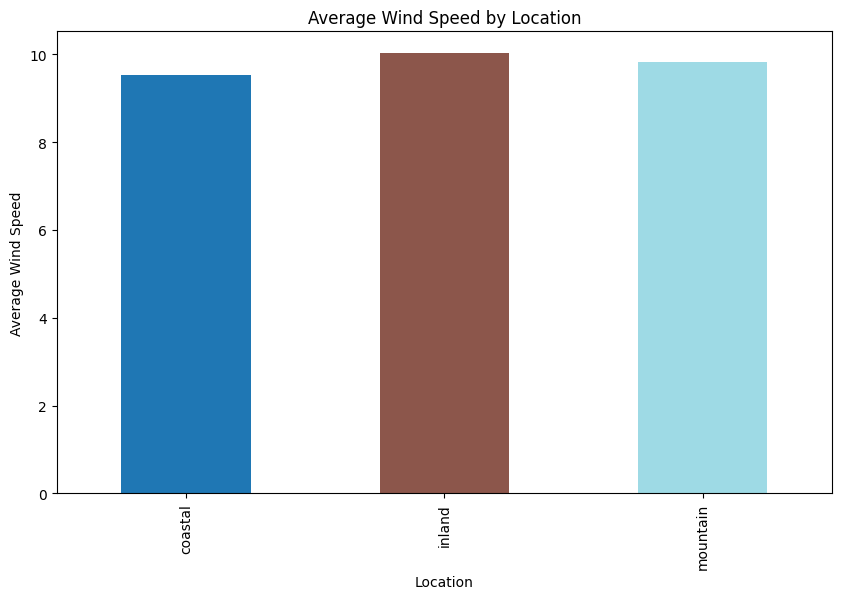

In [ ]:
# Calculate the average wind speed by location
location_wind_speed = train_set.groupby('Location')['Wind Speed'].mean()

# Create a color palette with a different color for each bar
colors = plt.cm.tab20(np.linspace(0, 1, len(location_wind_speed)))

# Plot the bar chart with different colors for each bar
location_wind_speed.plot(kind='bar', figsize=(10, 6), color=colors)
plt.xlabel('Location')
plt.ylabel('Average Wind Speed')
plt.title('Average Wind Speed by Location')
plt.show()

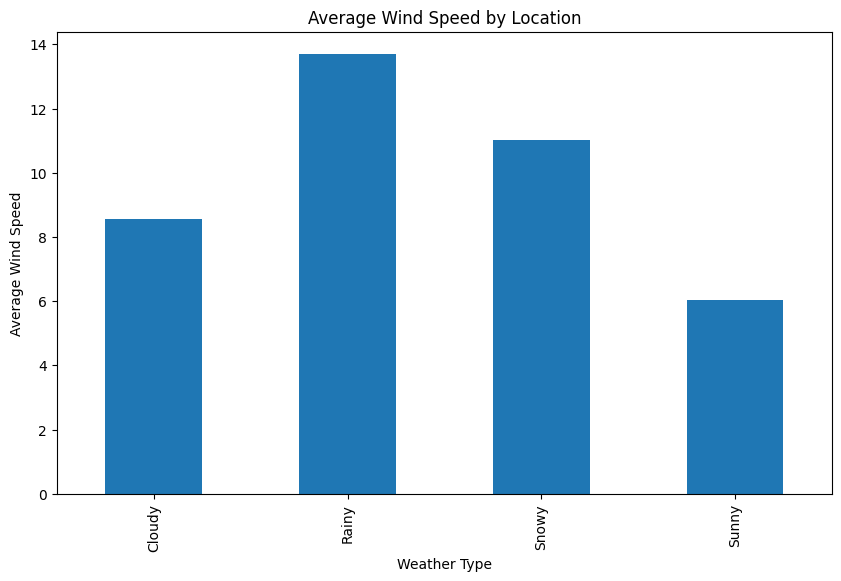

In [ ]:
location_wind_speed = train_set.groupby('Weather Type')['Wind Speed'].mean()

location_wind_speed.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Weather Type')
plt.ylabel('Average Wind Speed')
plt.title('Average Wind Speed by Location')
plt.show()

### Season, Humidity with Weather Type

In [ ]:
0

0

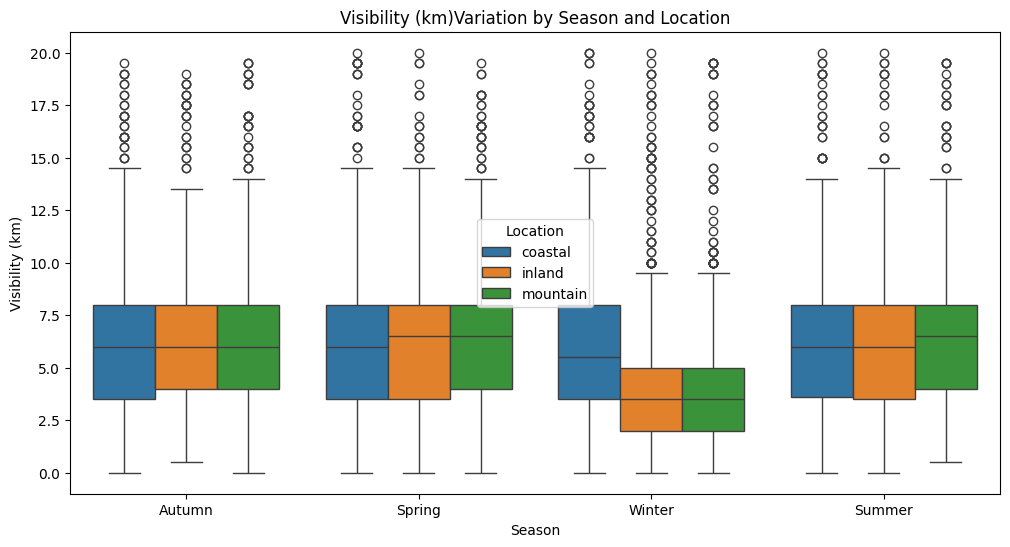

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_set, x='Season', y='Visibility (km)', hue='Location')
plt.title('Visibility (km)Variation by Season and Location')
plt.xlabel('Season')
plt.ylabel('Visibility (km)')
plt.legend(title='Location')
plt.show()

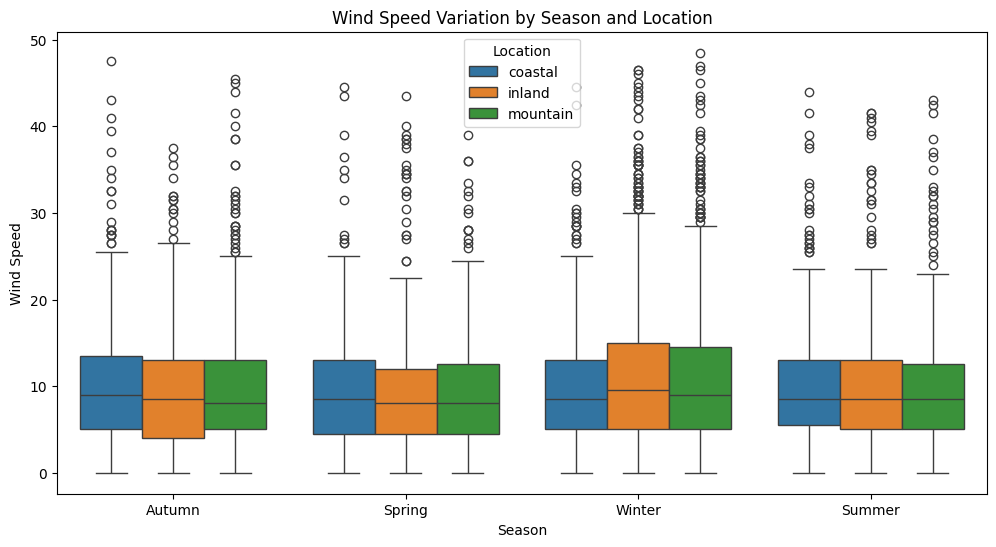

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_set, x='Season', y='Wind Speed', hue='Location')
plt.title('Wind Speed Variation by Season and Location')
plt.xlabel('Season')
plt.ylabel('Wind Speed')
plt.legend(title='Location')
plt.show()

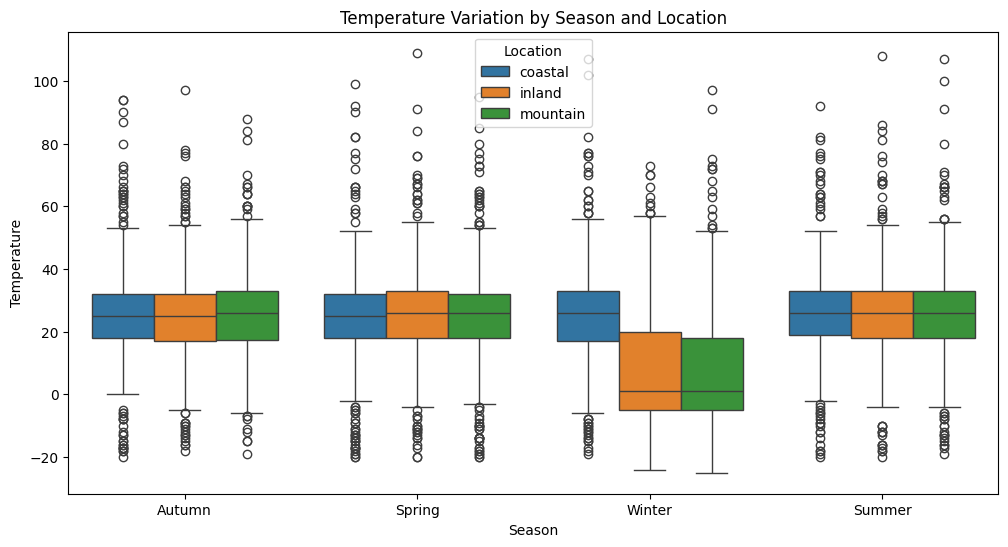

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_set, x='Season', y='Temperature', hue='Location')
plt.title('Temperature Variation by Season and Location')
plt.xlabel('Season')
plt.ylabel('Temperature')
plt.legend(title='Location')
plt.show()